# Comparaison de différents réseaux de convolutions sur un dataset

* Format attendu pour le calcul de la PR-curve: ***XYWH*** and ***ABSOLUTE***
    * Format GT: *XYXY* *ABSOLUTE*
    * Format yolov3: *XYXY* *ABSOLUTE*
    * Format EfficientDet: *XYXY* *ABSOLUTE*

In [1]:
import pickle
from pathlib import Path
from typing import List

import numpy as np
import matplotlib.pyplot as plt

from ioweyou.BoundingBox import BoundingBox, Image, evaluate_model, precision_recall_curve, mAP
from ioweyou.CoordinatesHandler import CoordinatesFormat, CoordinatesValues
from ioweyou.interface import import_bird_dataset

In [6]:
# code
def evaluate(model_path, title):
    gt_test, gt_train, gt_val = import_bird_dataset("data/bird_dataset/")
    for i in gt_val:
        i.internal_from_xyxy_to_xywh()
    # pickle interface todo
    with open(model_path, 'rb') as f:
        det_img_list: List[Image]= pickle.load(f)
    if "efficiendet" in str(model_path):
        for img in det_img_list:
            img.filename = img.filename.split('.')[0]
    # if yolov3 transform
    if det_img_list[0].bounding_boxes[0].coordinates_format == CoordinatesFormat.XYXY:
        for i in det_img_list:
            i.internal_from_xyxy_to_xywh()
    # P-R curve
    p, r =  precision_recall_curve(
        gt_val, det_img_list,
        confidence_threshold_values=np.linspace(0, 1, 100),
        display=True)
    # plt.title(title)
    print(f"mAP: {mAP(p, r)}")

## YOLOv3 - Baseline

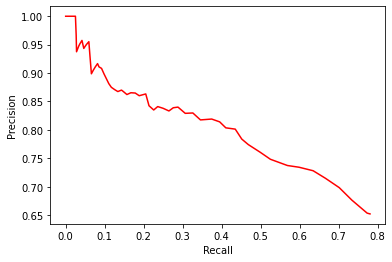

mAP: 0.6249531541832807


In [7]:
yolov3 = Path("data") / "yolov3_final.pkl"
evaluate(yolov3, "YOLOv3 - PR curve")


## YOLOv4

382


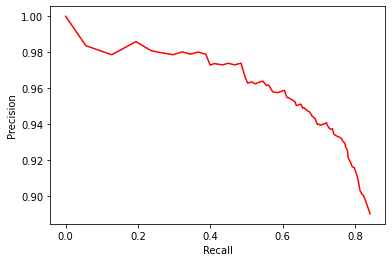

mAP: 0.8107372367967678


In [8]:
yolov4 = Path("data") / "yolov4_infered_bbxs.pickle"
evaluate(yolov4)


## EfficientDet 4

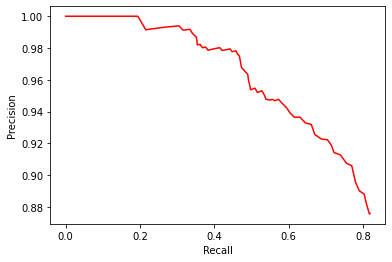

mAP: 0.7887283171852115


In [5]:
efficientdet = Path("data") / "efficiendet_infered_bbxs.pickle"
evaluate(efficientdet)

## Faster-RCNN

382


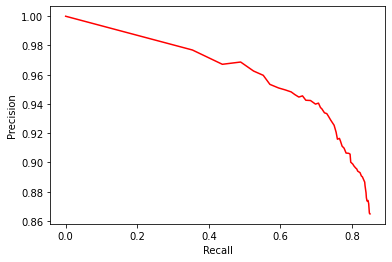

mAP: 0.8174804887859615


In [30]:
frcnn = Path("data") / "fasterRCNN_infered_bbxs.pickle"
evaluate(frcnn)


In [11]:
import pickle
with open(yolov3, 'rb') as f:
    data = pickle.load(f)

print(data[5])

Image: ~self.filename='000085', ~self.image_width=798, ~self.image_height=1200
    BoundingBox: ~[self.x=600.357666015625, self.y=450.0370178222656, self.w=716.6809692382812, self.h=511.23992919921875], ~self.confidence=0.5125340223312378
    BoundingBox: ~[self.x=215.2177734375, self.y=401.4310302734375, self.w=328.7632141113281, self.h=481.9879455566406], ~self.confidence=0.4640863537788391
    BoundingBox: ~[self.x=857.017822265625, self.y=474.4359130859375, self.w=999.8550415039062, self.h=570.590576171875], ~self.confidence=0.4179202914237976
    BoundingBox: ~[self.x=396.1375732421875, self.y=378.33770751953125, self.w=561.668701171875, self.h=443.09759521484375], ~self.confidence=0.3984510600566864
    BoundingBox: ~[self.x=246.5438690185547, self.y=183.806396484375, self.w=459.2712707519531, self.h=282.8244323730469], ~self.confidence=0.3982798755168915
    BoundingBox: ~[self.x=732.7809448242188, self.y=583.4594116210938, self.w=843.0550537109375, self.h=649.5314331054688], ~s